In [1]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/'My Drive'/


/content/drive/My Drive


In [3]:
!git clone https://github.com/1999Lyd/540.git


fatal: destination path '540' already exists and is not an empty directory.


In [4]:
%cd 540


/content/drive/My Drive/540


In [5]:
%cd data/raw

/content/drive/My Drive/540/data/raw


In [14]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

--2022-01-29 18:38:34--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-01-29 18:38:35--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?3yPlh1sVYI2PuT5E_EAy68_gzY8pxPvQlvqSUF3o-0ffWK9BF98u0SplS8OuAI4yN0FpCd4IDnaw8eLc-HQIzEOBA9ERQ

In [15]:
!ls

cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb  rename-example.txt
data_to_transform				    SVM.ipynb
pyimagedatadownloader.sh


In [16]:
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1704-9-0-local.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...
Setting up cuda-repo-ubuntu1704-9-0-local (9.0.176-1) ...


In [17]:
!ls /var/cuda-repo-9-0-local | grep .pub

7fa2af80.pub


In [18]:
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub

OK


In [19]:
!apt-get update

Get:1 file:/var/cuda-repo-9-0-local  InRelease
Ign:1 file:/var/cuda-repo-9-0-local  InRelease
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-0-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-0-local  Release.gpg [819 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 file:/var/cuda-repo-9-0-local  Packages [15.8 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:12 https://developer.downl

In [24]:
!sudo apt-get install cuda-9.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-9-0' for regex 'cuda-9.0'
Note, selecting 'libcuda-9.0-1' for regex 'cuda-9.0'
The following additional packages will be installed:
  cuda-command-line-tools-9-0 cuda-core-9-0 cuda-cublas-9-0
  cuda-cublas-dev-9-0 cuda-cudart-9-0 cuda-cudart-dev-9-0 cuda-cufft-9-0
  cuda-cufft-dev-9-0 cuda-curand-9-0 cuda-curand-dev-9-0 cuda-cusolver-9-0
  cuda-cusolver-dev-9-0 cuda-cusparse-9-0 cuda-cusparse-dev-9-0
  cuda-demo-suite-9-0 cuda-documentation-9-0 cuda-driver-dev-9-0
  cuda-libraries-9-0 cuda-libraries-dev-9-0 cuda-license-9-0
  cuda-misc-headers-9-0 cuda-npp-9-0 cuda-npp-dev-9-0 cuda-nvgraph-9-0
  cuda-nvgraph-dev-9-0 cuda-nvml-dev-9-0 cuda-nvrtc-9-0 cuda-nvrtc-dev-9-0
  cuda-runtime-9-0 cuda-samples-9-0 cuda-toolkit-9-0 cuda-visual-tools-9-0
The following NEW packages will be installed:
  cuda-9-0 cuda-command-line-tools-9-0 cuda-core-9-0 cuda-cublas-9-0
  cuda-cublas-de

In [25]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [26]:
!pip install thundersvm


In [41]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix
import pickle
from thundersvm import SVC


In [28]:
Categories = ['english','russian','telugu']
flat_data_arr=[]
target_arr=[]

datadir='data_to_transform'
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        
        try:
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(224,224,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        except (IOError,ValueError) as e:
            print('could not read the',img ,':',e,'hence skipping it.')
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : english
loaded category:english successfully
loading... category : russian
could not read the .ipynb_checkpoints : Could not find a format to read the specified file in mode 'i' hence skipping it.
loaded category:russian successfully
loading... category : telugu
could not read the .ipynb_checkpoints : Could not find a format to read the specified file in mode 'i' hence skipping it.
loaded category:telugu successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150489,150490,150491,150492,150493,150494,150495,150496,150497,150498,150499,150500,150501,150502,150503,150504,150505,150506,150507,150508,150509,150510,150511,150512,150513,150514,150515,150516,150517,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.163709,0.163709,0.163709,0.036748,0.036748,0.036748,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,...,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.023179,0.052802,0.052802,0.052802,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,..

In [29]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [30]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=SVC(C=100, kernel='rbf')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
#model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


In [31]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0., 2., 2., 1., 2., 2., 1., 2., 1., 0., 1., 0., 1., 2., 1., 0., 1.,
       1., 0., 0., 2., 2., 2., 2., 1., 0., 2., 0., 1., 0., 1., 2., 1., 1.,
       1., 1., 0., 2., 0., 1., 2., 1., 2., 1., 2., 1., 0., 0., 1., 1., 1.,
       1., 2., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 2., 2., 2., 2., 0.,
       0., 1., 2., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 2., 0., 0., 2., 1., 2., 0., 1., 2., 2., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 2., 2., 0., 2., 0., 0.,
       2., 1., 2., 0., 2., 1., 0., 0., 1., 2., 2., 2., 2., 0., 1., 1., 2.,
       0., 2., 0., 1., 1., 0., 2., 1., 2., 0., 1., 1., 2., 1., 1., 2., 0.,
       1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 0., 2., 0., 0., 2., 0., 0.,
       2., 1., 2., 2., 0., 0., 1., 0., 1., 0., 0., 2., 2., 1., 2., 0., 0.,
       0., 2., 2., 0., 0., 2., 2., 0., 1., 0., 0., 1., 0., 1., 2., 1., 0.,
       1., 0., 0., 0., 2.

In [32]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 53.62903225806451% accurate


In [38]:
y_test

1128    2
893     2
109     0
1211    2
1187    2
       ..
416     0
488     1
503     1
419     0
395     0
Name: Target, Length: 248, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


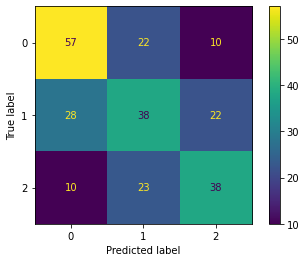

In [43]:
plot_confusion_matrix(model,x_test,y_test)